In [4]:
from sklearn import svm, metrics
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [5]:
dataset = []
with open (r'.\data\dataset_list', 'rb') as fp:
    dataset = pickle.load(fp)

In [6]:
water_mask = np.load(r'.\data\water_mask.npy')

In [7]:
water_mask = water_mask.reshape((10980,10980))

In [8]:
x = 3600
steps = 60
h = 10980
w = 10980
window_size = 10980//(steps)

In [9]:
dataset_mask = list()
prow = 0

for row in range(window_size,w+1,window_size):
    pcol = 0
    for col in range(window_size, h+1, window_size):
        dataset_mask.append(water_mask[prow:row, pcol:col])
        pcol = col
    prow = row

In [10]:
good_data = []
good_data_mask = []
for i in range(len(dataset)):
    data_mask = dataset_mask[i].flatten()
    unique, counts = np.unique(data_mask, return_counts=True)
    #print(unique,counts)
    if len(counts) == 2 and counts[1]/(counts[1]+counts[0]) >= 0.2 :
        good_data.append(dataset[i].flatten())
        good_data_mask.append(data_mask)
        

In [11]:
unique, counts = np.unique(good_data_mask[1], return_counts=True)
print(unique, counts)

[0 1] [25237  8252]


In [12]:
#for i in range(len(good_data))

In [13]:
X = good_data[0]
#X_test = good_data[1]
y = good_data_mask[0]
#y_test = good_data_mask[1]

#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)


In [14]:
df = pd.DataFrame({'X':X, 
                    'Y':y})
df.drop(df[df.X == 0].index,inplace=True)


In [15]:
df.describe()

,X,Y
count,33489.000000,33489.000000
mean,0.052841,0.236914
std,0.028679,0.425195
min,0.006900,0.000000
25%,0.023400,0.000000
50%,0.052500,0.000000
75%,0.071400,0.000000
max,0.268800,1.000000


In [16]:
X_1 = df.query('Y == 1').sample(7000)
X_0 = df.query('Y == 0').sample(7000)

In [17]:
sampled_df = pd.concat([X_1,X_0],keys=['X','Y'])
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)

In [18]:
X = df.X.values
y = df.Y.values

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
X_train,X_test_val,y_train,y_test_val = train_test_split(X,y,test_size=0.4,random_state=1234, stratify = y)
X_test,X_val, y_test, y_val = train_test_split(X_test_val,y_test_val,test_size=0.5,random_state=4321, stratify = y_test_val)

In [21]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1] [25555  7934]


In [22]:

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)



In [23]:
def show_confusion_matrix(y_test, y_pred, score):    
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return cm

In [24]:
kernels = ['rbf']


In [25]:
for kernel in kernels:
    clf = svm.SVC(kernel = kernel, C = 100000 )
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    print("Kernel:",kernel)
    print("testing Accuracy:",metrics.accuracy_score(y_test.flatten(), y_pred1))
    y_pred_val = clf.predict(X_val)
    print("validation Accuracy:",metrics.accuracy_score(y_val.flatten(), y_pred_val))

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel: rbf
testing Accuracy: 0.9241564646163034
validation Accuracy: 0.9295312033442819


In [27]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
lr_pred1 = logisticRegr.predict(X_test)
lr_score = logisticRegr.score(X_test, y_test)
print(lr_score)

0.8536876679605853


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


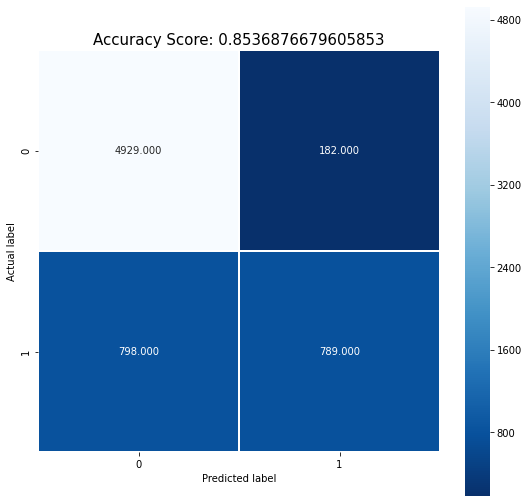

In [28]:
cm = show_confusion_matrix(y_test = y_test, y_pred = lr_pred1, score = lr_score)

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:",metrics.accuracy_score(y_test.flatten(), gnb_y_pred))

Gaussian Naive Bayes Accuracy: 0.9226634816363093


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


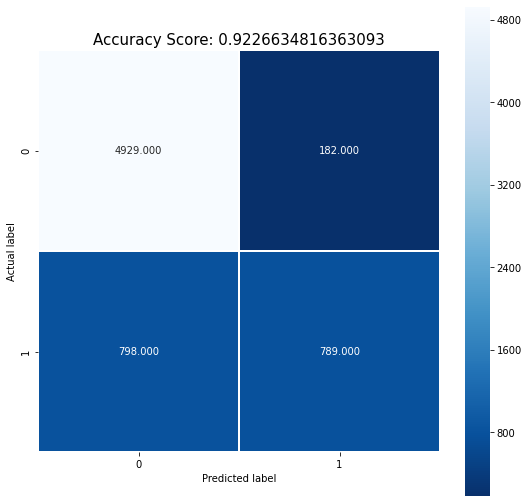

In [30]:
cm = show_confusion_matrix(y_test = y_test, y_pred = gnb_y_pred, score = metrics.accuracy_score(y_test.flatten(), gnb_y_pred) )